In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Data

In [16]:
x, y = load_breast_cancer(return_X_y=True,as_frame=False)
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [17]:
x_df, y_df = load_breast_cancer(return_X_y=True,as_frame=True)
x_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [19]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=0.70, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

# Tree Node

In [20]:
class TreeNode:
    def __init__(self, left=None, right=None, feature=None, feature_value=None, threshold=None, gain=None, samples=None):
        self.left = left
        self.right = right
        self.feature = feature
        self.feature_value = feature_value
        self.threshold = threshold
        self.gain = gain
        self.samples = samples

    def is_leaf(self):
        return self.feature_value is not None
    # node becomes leaf when it has a value

In [21]:
class DecisionTree:
    def __init__(self, max_depth, min_samples_split):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def build_tree(self, x, y, depth):
        samples, _ = x.shape # x dimensions is the samples with their features
        classes = len(np.unique(y))

        if(depth >= self.max_depth or samples < self.min_samples_split or classes == 1): # stopping conditions
            selected_class = np.bincount(y).argmax()
            return TreeNode(None, None, None, selected_class, None, None, samples) # return leaf node with most common class

        best_feature, best_threshold, best_gain = self.select_best_split(x, y)
        left_index, right_index = self.split_node(x, best_feature, best_threshold) # splitting the node at the best feature
        left_subtree = self.build_tree(x[left_index, :], y[left_index], depth + 1)
        right_subtree = self.build_tree(x[right_index, :], y[right_index], depth + 1)
        # print("Depth:", depth, "Samples:", samples)
        return TreeNode(left_subtree, right_subtree, best_feature, None, best_threshold, best_gain, samples) # return new node

    def calculate_Entropy(self, y):
        counts = np.bincount(y) # counts of each class in y
        probabilities = counts / counts.sum()
        entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
        return entropy

    def split_node(self, x, feature, threshold):
        left_index = x[:, feature] <= threshold # splitting samples at that feature and threshold
        right_index = x[:, feature] > threshold

        return left_index, right_index

    def calculate_Information_Gain(self, x, y, feature, threshold):
        original_entropy = self.calculate_Entropy(y) #H(y)
        left_index, right_index = self.split_node(x, feature, threshold)
        n, n_left, n_right = len(y), len(y[left_index]), len(y[right_index])
        if n_left == 0 or n_right == 0: # no split
            return 0
        new_entropy = (n_left / n) * self.calculate_Entropy(y[left_index]) + (n_right / n) * self.calculate_Entropy(y[right_index]) # entropies * their weights
        information_gain = original_entropy - new_entropy
        return information_gain

    def select_best_split(self, x, y):
        best_information_gain = -1
        best_feature, best_threshold = None, None
        features = x.shape[1]

        subset_size = int(np.sqrt(features))
        feature_subset = np.random.choice(features, subset_size, replace=False)
#  range(features) = [0,1,2,3]
#  features subset = [3,1]
        for feature in feature_subset:
            values = np.sort(np.unique(x[:, feature]))
            thresholds = (values[:-1] + values[1:]) / 2 # midpoints between values
            for threshold in thresholds:
                information_gain = self.calculate_Information_Gain(x, y, feature, threshold)
                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold, best_information_gain

    def fit(self, x, y):
        self.features = x.shape[1]
        self.root = self.build_tree(x, y, 0) # building the tree starting from depth 0

    def traverse_tree(self, x, node): # for prediction
        if node.is_leaf():
            return node.feature_value
        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left)
        else:
            return self.traverse_tree(x, node.right)

    def predict(self, x):
        predictions = []
        for sample in x:
            prediction = self.traverse_tree(sample, self.root)
            predictions.append(prediction)
        return predictions

    def calculate_feature_importance(self):
        feature_importance = np.zeros(self.features)
        self.traverse_importance(self.root, feature_importance)
        feature_importance /= feature_importance.sum() # importance normalization
        return feature_importance

    def traverse_importance(self, node, feature_importance):
        if node.is_leaf():
            return
        feature_importance[node.feature] += node.gain * node.samples # calculating importance at each node
        self.traverse_importance(node.left, feature_importance)
        self.traverse_importance(node.right, feature_importance)





# Random Forest

In [22]:
class RandomForest:
  def __init__(self, max_depth, min_samples_split, no_of_trees, max_features):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.no_of_trees = no_of_trees
        self.max_features = max_features
        self.trees = []

  def set_no_of_trees(self, no_of_trees):
    self.no_of_trees = no_of_trees
  def set_max_features(self, max_features):
    self.max_features = max_features
  def set_max_depth(self, max_depth):
    self.max_depth = max_depth
  def set_min_samples_split(self, min_samples_split):
    self.min_samples_split = min_samples_split

  def build_forest(self, x_train, y_train):
    for _ in range(self.no_of_trees):
      tree = DecisionTree(self.max_depth, self.min_samples_split)
      indices = np.random.choice(len(x_train), len(x_train), replace=True)
      x_sample = x_train[indices]
      y_sample = y_train[indices]
      tree.fit(x_sample, y_sample)
      self.trees.append(tree)

  def predict(self, x_test):
    predictions = [] # array of y_preds
    for tree in self.trees:
      predictions.append(tree.predict(x_test))
    final_preds = []
    for i in range(x_test.shape[0]):
      count_1s = 0
      count_0s = 0
      for j in range(len(predictions)):
        if predictions[j][i] == 1:
          count_1s += 1
        else:
          count_0s += 1
      if count_1s > count_0s:
        final_preds.append(1)
      else:
        final_preds.append(0)
    return final_preds

In [23]:
rf = RandomForest(max_depth=10, min_samples_split=2, no_of_trees=10, max_features=np.floor(np.sqrt(x_df.shape[1])))
rf.build_forest(x_train, y_train)
ypred = rf.predict(x_test)
train_accuracy = accuracy_score(y_train, rf.predict(x_train))
test_accuracy = accuracy_score(y_test, ypred)
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(classification_report(y_test, ypred))

Train Accuracy: 99.75%
Test Accuracy: 94.19%
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.95      0.97      0.96        60

    accuracy                           0.94        86
   macro avg       0.94      0.93      0.93        86
weighted avg       0.94      0.94      0.94        86



In [24]:
train_accuracy = accuracy_score(y_train, rf.predict(x_train))
test_accuracy = accuracy_score(y_test, ypred)
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(classification_report(y_test, ypred))

Train Accuracy: 99.75%
Test Accuracy: 94.19%
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.95      0.97      0.96        60

    accuracy                           0.94        86
   macro avg       0.94      0.93      0.93        86
weighted avg       0.94      0.94      0.94        86



# Hyperparamters tuning

In [25]:
max_depth_arr = [2, 4, 6, 8, 10]
min_samples_split_arr = [2, 5, 10]
num_of_trees = [5, 10, 30, 50]
max_features_arr = [np.floor(np.sqrt(x_df.shape[1])), np.floor(x_df.shape[1]/2)]
best_params = {
    "max_depth": None,
    "min_samples_split": None,
    "no_of_trees": None,
    "max_features": None,
    "val_accuracy": -1,   # best seen so far
    "train_accuracy": -1
}
def tuningHyperparameters():
    global best_params
    index = 0
    for max_depth in max_depth_arr:
      for min_samples_split in min_samples_split_arr:
        for no_of_trees in num_of_trees:
          for max_features in max_features_arr:
            rf = RandomForest(max_depth, min_samples_split, no_of_trees, max_features)
            rf.build_forest(x_train, y_train)
            ypred = rf.predict(x_val)
            val_accuracy = accuracy_score(y_val, ypred)
            train_accuracy = accuracy_score(y_train, rf.predict(x_train))
            print(f"{index} Max Depth: {max_depth}\n Min Samples Split: {min_samples_split} \n Number Of Trees: {no_of_trees} \n Max Features: {max_features} \n Training Accuracy: {train_accuracy*100:.2f}%\n Validation Accuracy: {val_accuracy*100:.2f}%\n")
            index +=1
            if val_accuracy > best_params["val_accuracy"]:
                best_params["max_depth"] = max_depth
                best_params["min_samples_split"] = min_samples_split
                best_params["no_of_trees"] = no_of_trees
                best_params["max_features"] = max_features
                best_params["val_accuracy"] = val_accuracy
                best_params["train_accuracy"] = train_accuracy
tuningHyperparameters()
print("Best Parameters Found:\n", best_params)

0 Max Depth: 2
 Min Samples Split: 2 
 Number Of Trees: 5 
 Max Features: 5.0 
 Training Accuracy: 95.23%
 Validation Accuracy: 94.12%

1 Max Depth: 2
 Min Samples Split: 2 
 Number Of Trees: 5 
 Max Features: 15.0 
 Training Accuracy: 94.97%
 Validation Accuracy: 94.12%

2 Max Depth: 2
 Min Samples Split: 2 
 Number Of Trees: 10 
 Max Features: 5.0 
 Training Accuracy: 95.73%
 Validation Accuracy: 92.94%

3 Max Depth: 2
 Min Samples Split: 2 
 Number Of Trees: 10 
 Max Features: 15.0 
 Training Accuracy: 95.98%
 Validation Accuracy: 95.29%

4 Max Depth: 2
 Min Samples Split: 2 
 Number Of Trees: 30 
 Max Features: 5.0 
 Training Accuracy: 95.23%
 Validation Accuracy: 95.29%

5 Max Depth: 2
 Min Samples Split: 2 
 Number Of Trees: 30 
 Max Features: 15.0 
 Training Accuracy: 95.48%
 Validation Accuracy: 96.47%

6 Max Depth: 2
 Min Samples Split: 2 
 Number Of Trees: 50 
 Max Features: 5.0 
 Training Accuracy: 95.48%
 Validation Accuracy: 92.94%

7 Max Depth: 2
 Min Samples Split: 2 
 N

In [26]:
rf.set_max_depth(best_params["max_depth"])
rf.set_min_samples_split(best_params["min_samples_split"])
rf.set_no_of_trees(best_params["no_of_trees"])
rf.set_max_features(best_params["max_features"])
rf.build_forest(x_train, y_train)

In [27]:
train_accuracy = accuracy_score(y_train, rf.predict(x_train))
test_accuracy = accuracy_score(y_test, ypred)
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(classification_report(y_test, ypred))

Train Accuracy: 99.50%
Test Accuracy: 94.19%
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.95      0.97      0.96        60

    accuracy                           0.94        86
   macro avg       0.94      0.93      0.93        86
weighted avg       0.94      0.94      0.94        86



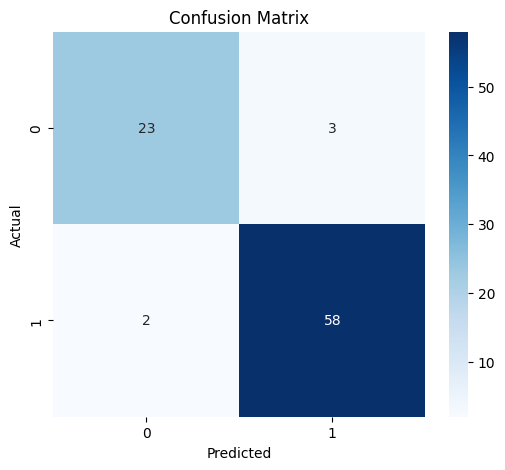

In [28]:
cm = confusion_matrix(y_test, ypred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()